In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
from xgcm import Grid
import numpy as np

In [3]:
def load_data(dir_name):

    exp_dic = {}
    
    exp_dic['prog'] = xr.open_mfdataset(dir_name + 'prog*.nc', decode_times=False)
    exp_dic['cont'] = xr.open_mfdataset(dir_name + 'cont*.nc', decode_times=False)
    exp_dic['stat'] = xr.open_dataset(dir_name + 'ocean.stats.nc')

    return exp_dic

In [4]:
exp_noparam = load_data('/scratch/db194/mom6/nov2024/double_gyre_20km/')

ERROR 1: PROJ: proj_create_from_database: Open of /ext3/miniforge/share/proj failed


In [5]:
exp_NGM_upslope_false = load_data('/scratch/db194/mom6/nov2024/double_gyre_20km_NGM_upslope_false/')

In [6]:
exp_NGM_simple = load_data('/scratch/db194/mom6/nov2024/double_gyre_20km_NGM/')

In [7]:
exp_NGM_deformable = load_data('/scratch/db194/mom6/nov2024/double_gyre_20km_NGM_deformable_h_true/')

In [21]:
exp_NGM_15_deformable = load_data('/scratch/db194/mom6/nov2024/double_gyre_20km_NGM_2_deformable_h_true/')

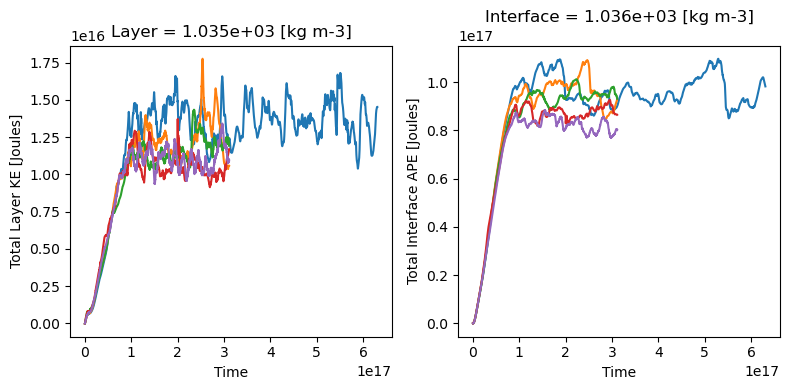

In [23]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
exp_noparam['stat'].KE.isel(Layer=0).plot()
exp_NGM_simple['stat'].KE.isel(Layer=0).plot()
exp_NGM_deformable['stat'].KE.isel(Layer=0).plot()
exp_NGM_15_deformable['stat'].KE.isel(Layer=0).plot()
exp_NGM_upslope_false['stat'].KE.isel(Layer=0).plot()


plt.subplot(122) 
exp_noparam['stat'].APE.isel(Interface=1).plot()
exp_NGM_simple['stat'].APE.isel(Interface=1).plot()
exp_NGM_deformable['stat'].APE.isel(Interface=1).plot()
exp_NGM_15_deformable['stat'].APE.isel(Interface=1).plot()
exp_NGM_upslope_false['stat'].APE.isel(Interface=1).plot()

plt.tight_layout()

In [24]:
def plot_VGM_inputs(ds):

    plt.figure(figsize=(12, 6))
    
    plt.subplot(231)
    ds.dudx_c.isel(Time=-1, zl=1).plot(robust=True)
    
    plt.subplot(232)
    ds.dudy_c.isel(Time=-1, zl=1).plot(robust=True)
    
    plt.subplot(233)
    ds.dhdx_c.isel(Time=-1, zl=1).plot(robust=True)
    
    plt.subplot(234)
    ds.dvdx_c.isel(Time=-1, zl=1).plot(robust=True)
    
    plt.subplot(235)
    ds.dvdy_c.isel(Time=-1, zl=1).plot(robust=True)
    
    plt.subplot(236)
    ds.dhdy_c.isel(Time=-1, zl=1).plot(robust=True)
    
    plt.tight_layout()

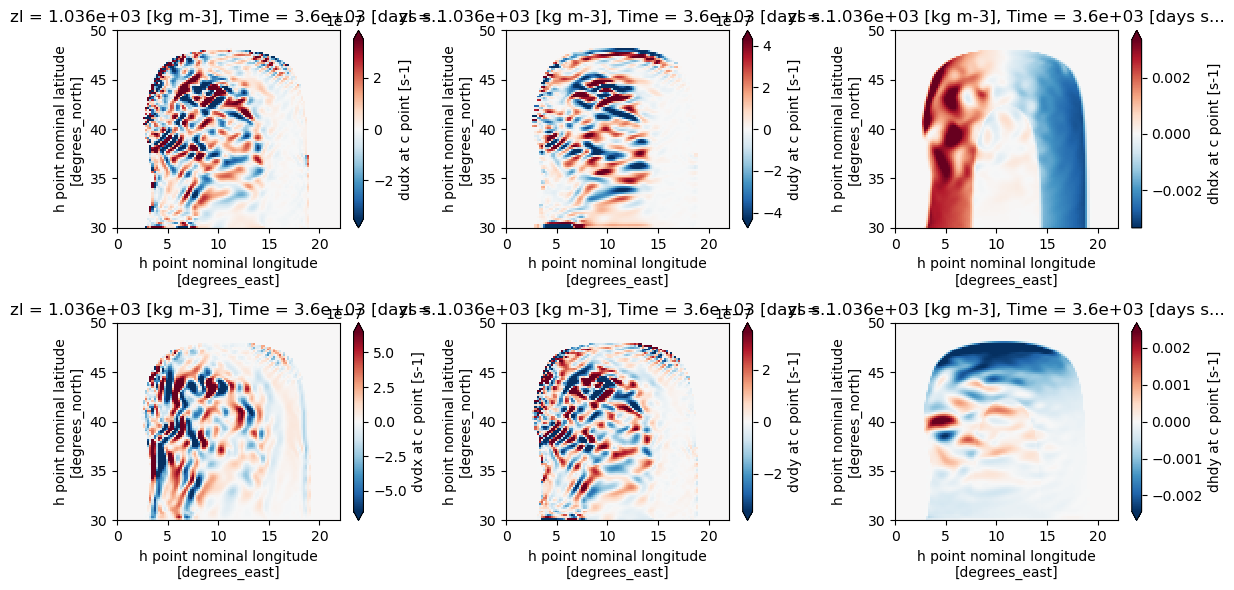

In [25]:
plot_VGM_inputs(exp_NGM_simple['cont'])

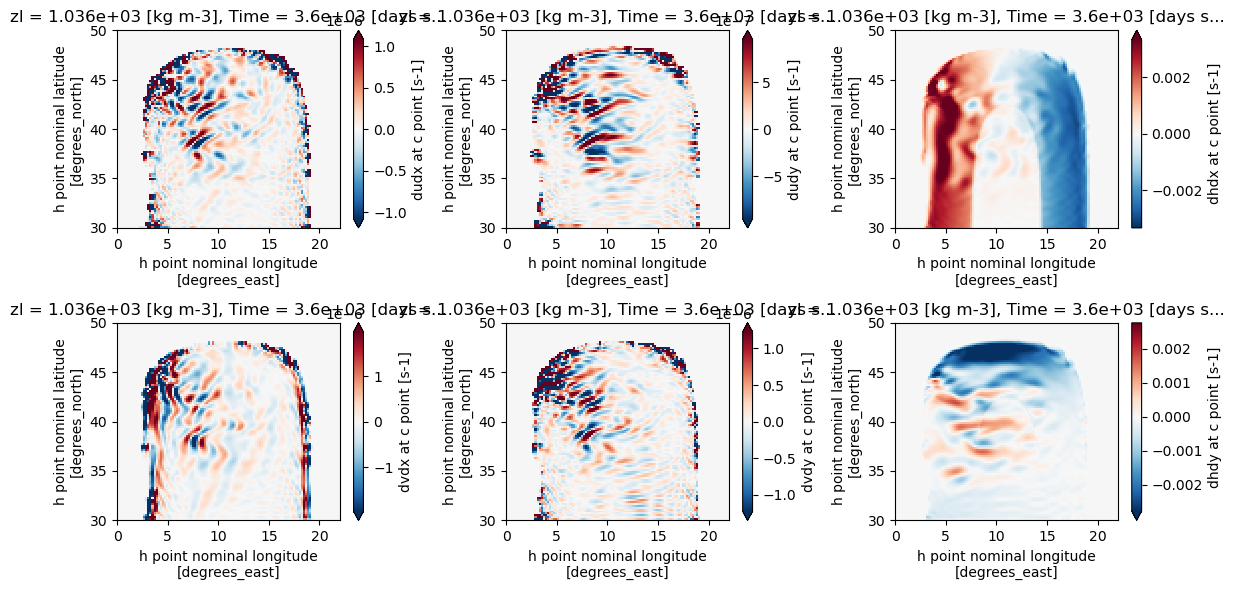

In [26]:
plot_VGM_inputs(exp_NGM_upslope_false['cont'])

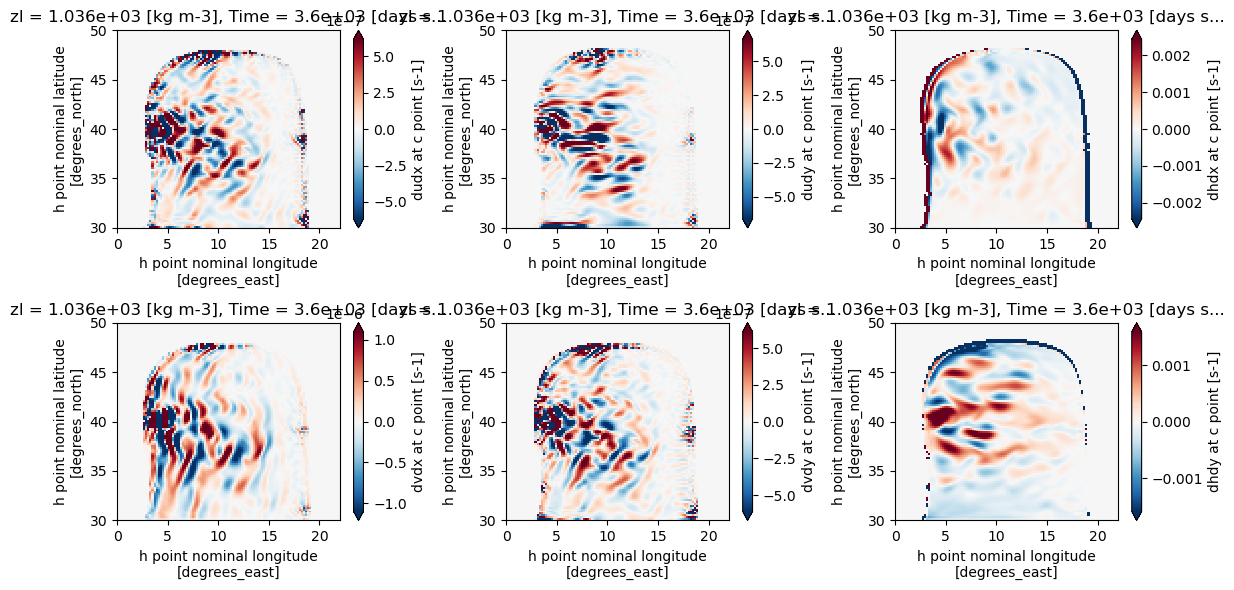

In [27]:
plot_VGM_inputs(exp_NGM_deformable['cont'])

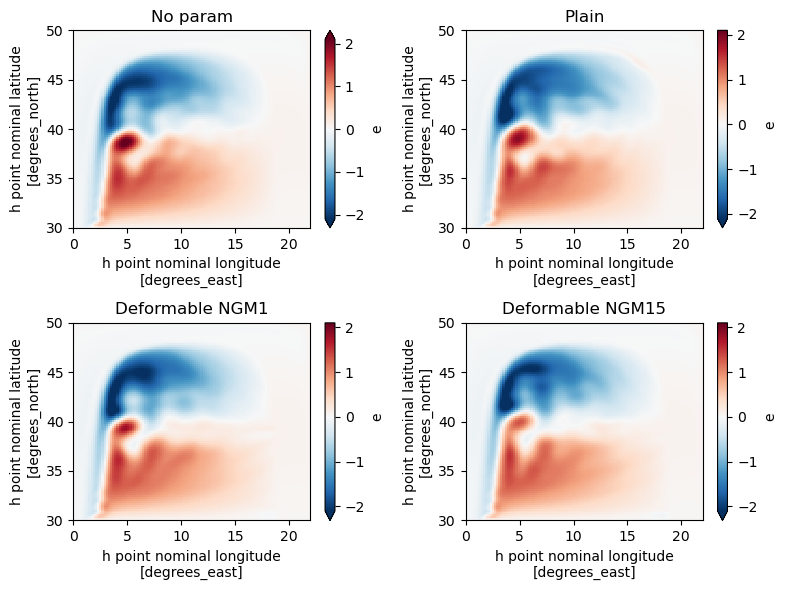

In [29]:
plt.figure(figsize=(8,6))

plt.subplot(221)
exp_noparam['prog'].e.isel(Time=slice(360,720), zi=0).mean('Time').plot(vmin=-2.1)
plt.title('No param')

plt.subplot(222)
exp_NGM_simple['prog'].e.isel(Time=slice(360,720), zi=0).mean('Time').plot(vmin=-2.1)
plt.title('Plain')

plt.subplot(223)
exp_NGM_deformable['prog'].e.isel(Time=slice(360,720), zi=0).mean('Time').plot(vmin=-2.1)
plt.title('Deformable NGM1')

plt.subplot(224)
exp_NGM_15_deformable['prog'].e.isel(Time=slice(360,720), zi=0).mean('Time').plot(vmin=-2.1)
plt.title('Deformable NGM15')

plt.tight_layout()